# Project - Spervised Learning: part 1

### Context

Medical research university X is undergoing a deep research on patients with certain conditions. 
University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by 
the client by providing different datasets to the AI team for developing a AIML model which can predict the 
condition of the patient depending on the received test results. 

### DATA DESCRIPTION: The data consists of the following attributes: 
1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

# Solution

(Submitted by - Harsh Pundhir)

In [1]:
#Loading the main libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

## 1. Reading CSV's and EDA

In [2]:
data1 = pd.read_csv("Part1 - Normal.csv")
print(data1.head())
print("Shape of Normal classified dataset is",data1.shape)
print("Total elements/size of Normal classified dataset is",data1.size)

   P_incidence     P_tilt    L_angle    S_slope    P_radius  S_Degree   Class
0    38.505273  16.964297  35.112814  21.540976  127.632875  7.986683  Normal
1    54.920858  18.968430  51.601455  35.952428  125.846646  2.001642  Normal
2    44.362490   8.945435  46.902096  35.417055  129.220682  4.994195  Normal
3    48.318931  17.452121  48.000000  30.866809  128.980308 -0.910941  Normal
4    45.701789  10.659859  42.577846  35.041929  130.178314 -3.388910  Normal
Shape of Normal classified dataset is (100, 7)
Total elements/size of Normal classified dataset is 700


In [3]:
data1['Class'].replace("Nrmal","Normal",inplace=True)
print(data1[data1['Class']=="Nrmal"].value_counts().sum())
print(data1[data1['Class']=="Normal"].value_counts().sum())

0
100


- Replaced "Nrmal" to Normal.
- Counted values of each for assurance

In [4]:
data2 = pd.read_csv("Part1 - Type_H.csv")
print(data2.head())
print("Shape of type_H dataset is",data2.shape)
print("Total elements/size of type_H classified dataset is",data2.size)

   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400  Type_H
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259  Type_H
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317  Type_H
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523  Type_H
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501  Type_H
Shape of type_H dataset is (60, 7)
Total elements/size of type_H classified dataset is 420


In [5]:
data2['Class'].replace("type_h","Type_H",inplace=True)
print(data2[data2['Class']=="type_h"].value_counts().sum())
print(data2[data2['Class']=="Type_H"].value_counts().sum())

0
60


- Replaced "type_h" to "Type_H".
- Counted values of each for assurance

In [6]:
data3 = pd.read_csv("Part1 - Type_S.csv")
print(data3.head())
print("Shape of Normal classified dataset is",data3.shape)
print("Total elements/size of Normal classified dataset is",data3.size)

   P_incidence     P_tilt    L_angle    S_slope    P_radius   S_Degree   Class
0    74.377678  32.053104  78.772013  42.324573  143.560690  56.125906  Type_S
1    89.680567  32.704435  83.130732  56.976132  129.955476  92.027277  Type_S
2    44.529051   9.433234  52.000000  35.095817  134.711772  29.106575  Type_S
3    77.690577  21.380645  64.429442  56.309932  114.818751  26.931841  Type_S
4    76.147212  21.936186  82.961502  54.211027  123.932010  10.431972  Type_S
Shape of Normal classified dataset is (150, 7)
Total elements/size of Normal classified dataset is 1050


In [7]:
data3['Class'].replace("tp_s","Type_S",inplace=True)
print(data3[data3['Class']=="tp_s"].value_counts().sum())
print(data3[data3['Class']=="Type_S"].value_counts().sum())

0
150


- Replaced "tp_s" to "Type_S".
- Counted values of each for assurance

In [8]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB
None


### Inference:

In data1 sheet the datatype of each numericlal column (hence, excluding the column class) is float64 with no null values, hence proceeding to data2 sheet.

In [9]:
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB
None


### Inference:

In data2 sheet the datatype of each numericlal  column (hence, excluding the column class) is float64 with no null values, hence proceeding to data3 sheet.

In [10]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB
None


### Inference:

In all the sheets the datatype of each numericlal column (hence, excluding the column class) is float64 with no null values, hence proceeding to data merging.

## 2. Merging datasets

In [11]:
data_merged = pd.concat([data1,data2,data3],ignore_index=True)
print(data_merged)
print(data_merged.info())

     P_incidence     P_tilt    L_angle    S_slope    P_radius    S_Degree  \
0      38.505273  16.964297  35.112814  21.540976  127.632875    7.986683   
1      54.920858  18.968430  51.601455  35.952428  125.846646    2.001642   
2      44.362490   8.945435  46.902096  35.417055  129.220682    4.994195   
3      48.318931  17.452121  48.000000  30.866809  128.980308   -0.910941   
4      45.701789  10.659859  42.577846  35.041929  130.178314   -3.388910   
..           ...        ...        ...        ...         ...         ...   
305    80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
306    95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
307    74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
308    87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
309    48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

      Class  
0    Normal  
1    Normal  
2    Normal  
3    Normal  
4    

## 3. Basic statistical analysis

In [12]:
data_merged.describe(include = 'all')

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310
unique,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,Type_S
freq,NaN,NaN,NaN,NaN,NaN,NaN,150
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,NaN


### Inference:
1. Class is left with 3 variables, Type_S being the one with maximum occurences
2. Except S_Degree other numerical columns do not seem highly skewed
3. S_degree seems skewed

### 3.1 Counting outliers using statistics

In [14]:
temp = data_merged.drop(['Class'],axis=1)
lower_fence = temp.quantile(q=0.25) - (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5
top_fence = temp.quantile(q=0.75) + (temp.quantile(q=0.75) - temp.quantile(q=0.25))*1.5

(temp[temp > top_fence]).count()


P_incidence     3
P_tilt         12
L_angle         1
S_slope         1
P_radius        5
S_Degree       10
dtype: int64

- Significicant upper outliers can be observed in P_tilt and S_degree 

In [15]:
(temp[temp < lower_fence]).count()

P_incidence    0
P_tilt         1
L_angle        0
S_slope        0
P_radius       6
S_Degree       0
dtype: int64

- No sifgnificant outliers below the lower fence in the data.

## 4. Visualization

### 4.1 Univariate Analysis

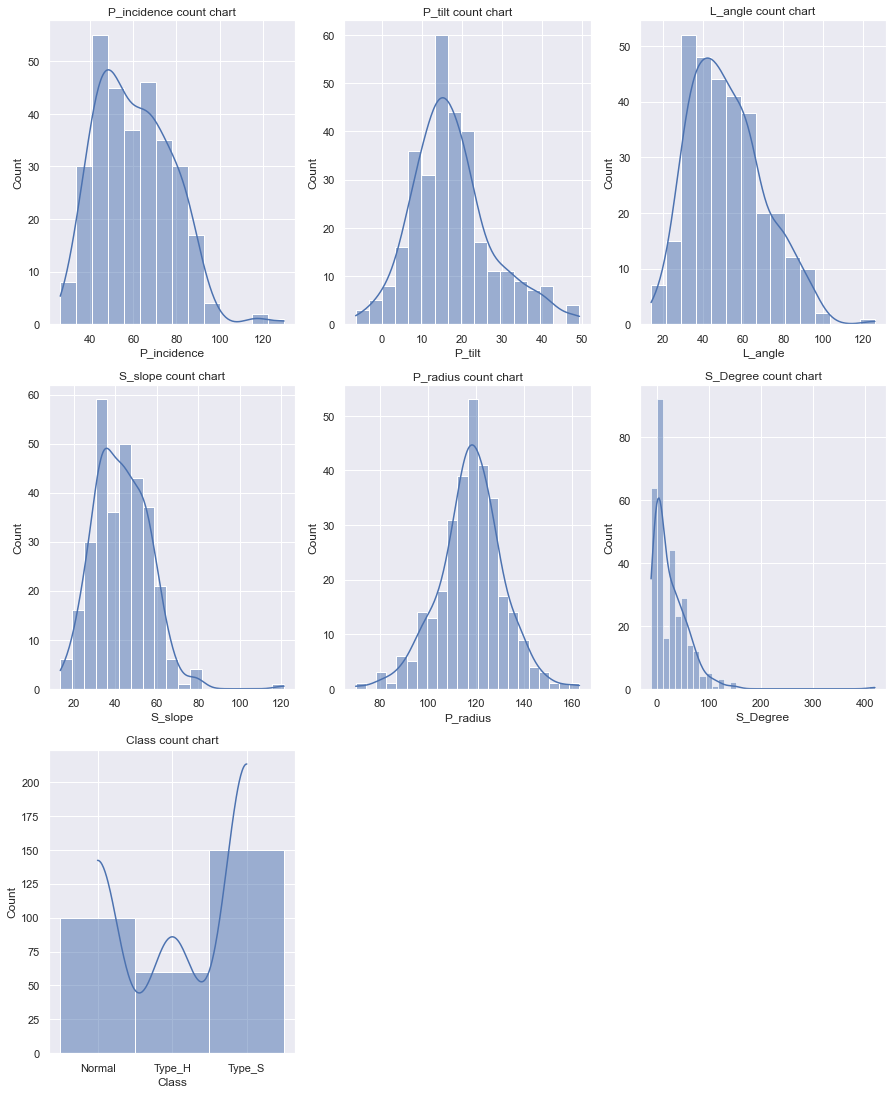

In [13]:
a = 3  # number of rows
b = 3  # number of columns
c=1

fig = plt.figure(figsize=(15,19))

for i in data_merged.columns:
    
    plt.subplot(a, b, c)
    plt.title('{} count chart'.format(i))
    plt.xlabel(i)
    sns.histplot(data_merged[i],kde=True);
    c=c+1

### Inference:
- P_radius fits normal distribution pretty well
- Type_S has maximum occurences


C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

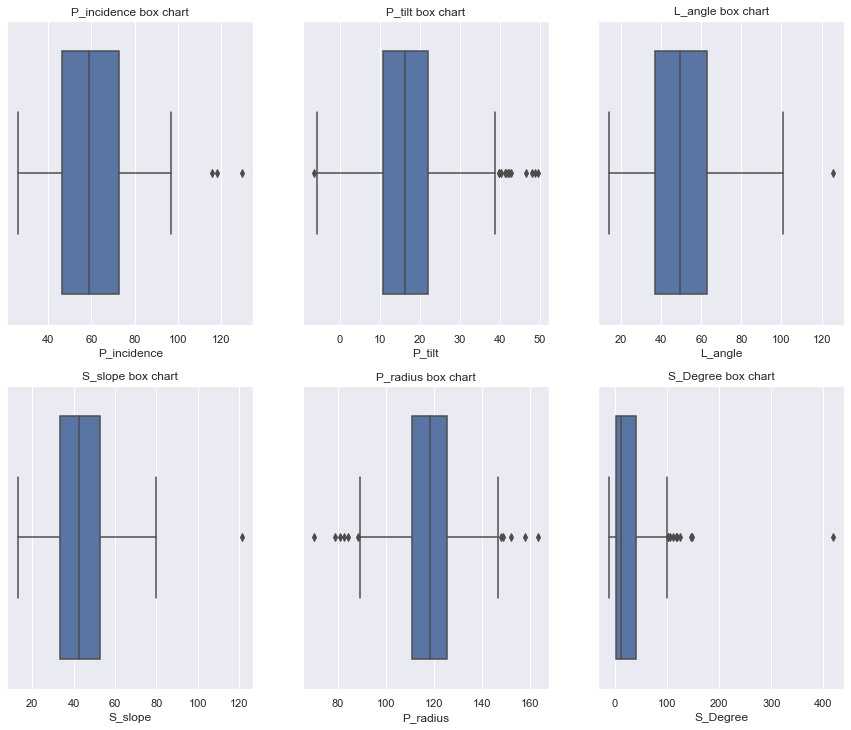

In [14]:
a = 3  # number of rows
b = 3  # number of columns
c=1

fig = plt.figure(figsize=(15,19))

for i in data_merged.drop(['Class'],axis=1).columns:  # dropping column class as it is categorical type.
    
    plt.subplot(a, b, c)
    plt.title('{} box chart'.format(i))
    plt.xlabel(i)
    sns.boxplot(data_merged[i]);
    c=c+1


### Inference:
1. P_tilt, P_radius and S_Degree have significant outliers.
2. All other numerical columns have less outliers (<=3).


### 4.2 Bivariate and Multivariate analysis

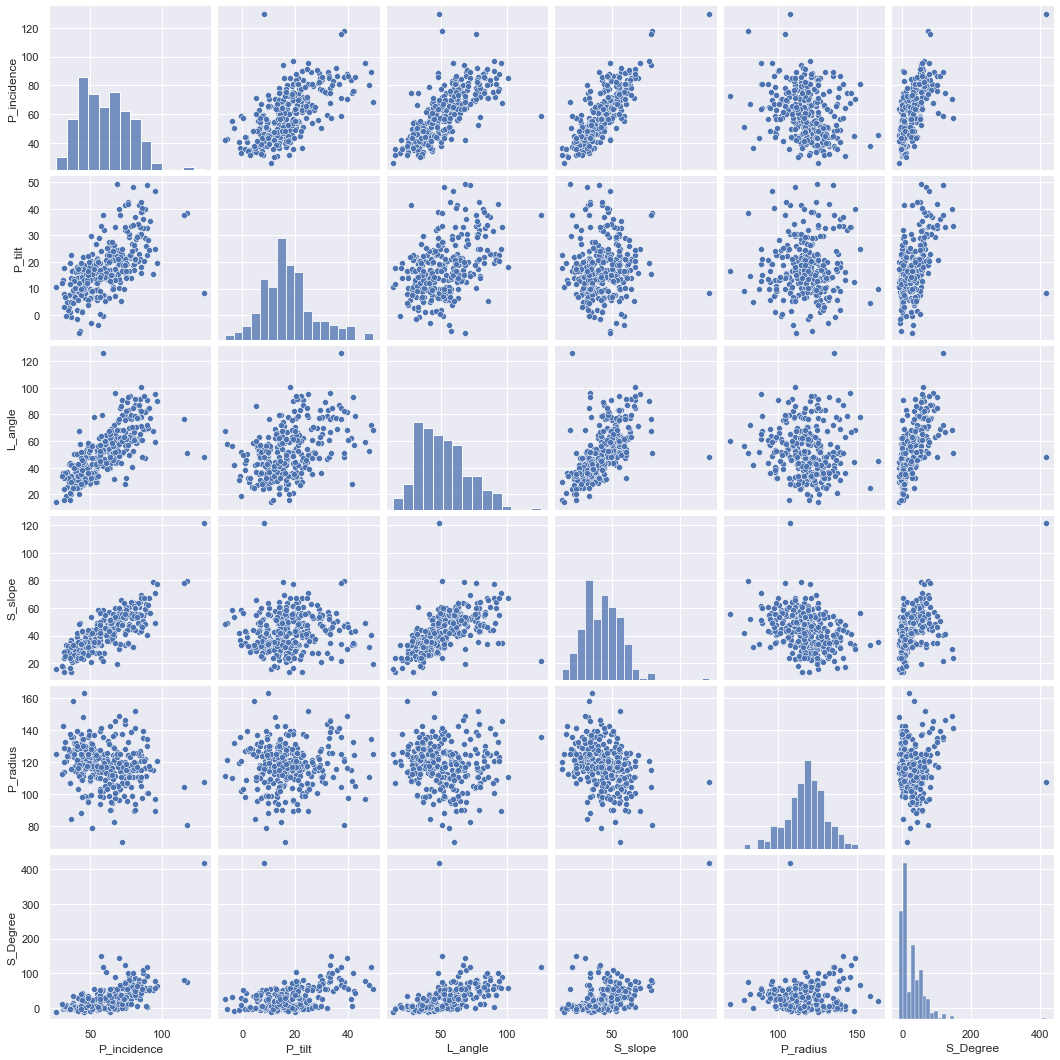

In [15]:
sns.set(rc = {'figure.figsize':(7,8)})
sns.pairplot(data = data_merged);

### Inference
1. P_incidence vs L_angle seem to have a good positive correlation.
2. P_incidence vs S_slope seem to have a good positive correlation.
3. S_slope vs L_angle seem to have a good positive correlation.
4. As S_Degree was skewed, it is pushing its subsequent plots in a vertical region.
5. P_radius with L_angle, P_incidence, S_slope, P_tilt seems to have no correlation.

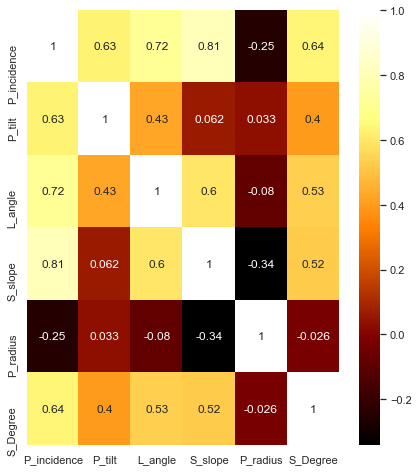

In [16]:
sns.heatmap(data = data_merged.corr(),annot=True,cmap ='afmhot');

- Confirming the correlations that infered from the pairplot of the data_merged

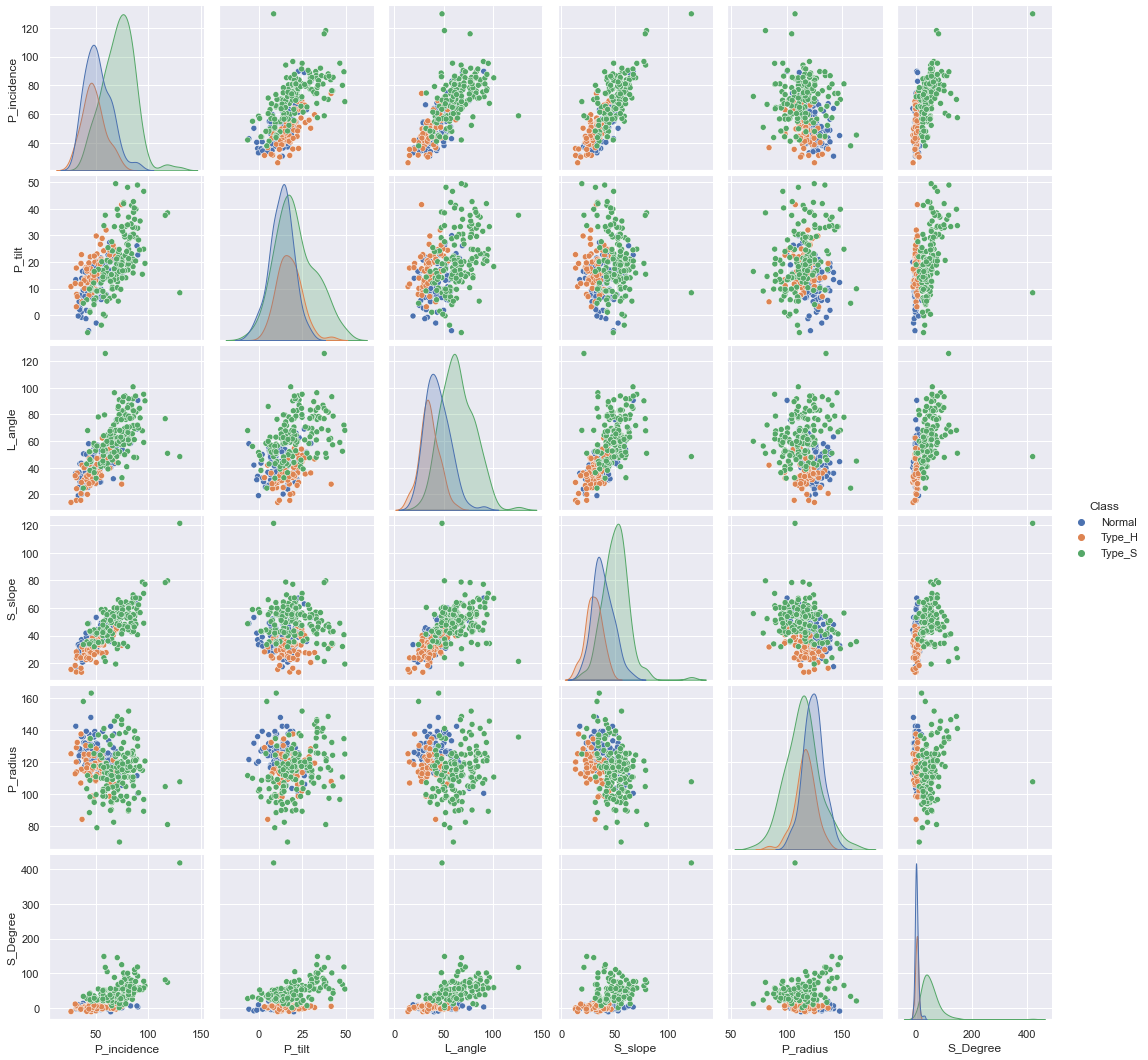

In [17]:
sns.set(rc = {'figure.figsize':(7,8)})
sns.pairplot(data = data_merged, hue = 'Class');

### Inference

1. Entries with high values of P_radius, P_tilt, P_incidence and L_angle taken pairwise tend to have type_S as their class.
2. Most of the outliers follow the type_S as its class.

## 5. Label Encoding

C:\Users\Harsh Pundhir\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


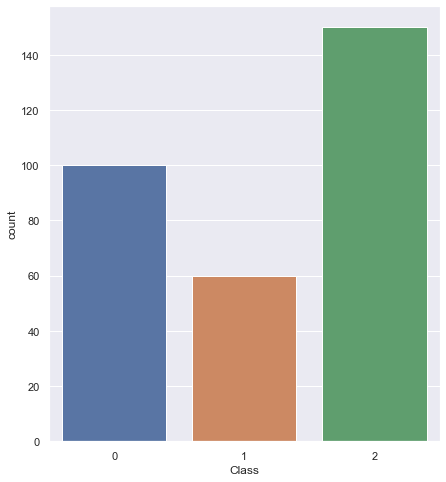

In [18]:
#Use label encoder to convert categorical variables to label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset = data_merged.copy() 
dataset['Class'] = le.fit_transform(dataset['Class'])

sns.countplot(dataset['Class']);

- Normal got transformed to class 0
- type_H got transformed to class 1
- type_S got transformed to class 2

In [20]:
#standardization and feature splitting of data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


dataset_nonclass = dataset.drop(['Class'],axis = 1) # feature split
Y = dataset['Class']  # feature split

X_std = pd.DataFrame(StandardScaler().fit_transform(dataset_nonclass))
X_std.columns = dataset_nonclass.columns
X_std.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,1.042177e-16,2.096889e-16,1.980495e-16,2.829278e-17,-5.071212e-16,-1.277204e-16
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


- It is clear that the data was succesfully normalized

## 6. Train-test split

In [21]:
# Train-test splitting
from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y, test_size=0.3, random_state=10)

In [22]:
print(X_train.shape)
print(Y_train.shape)

(217, 6)
(217,)


- Train is great!

In [23]:
print(X_test.shape)
print(Y_test.shape)

(93, 6)
(93,)


- Test is great as well!

## 7. KNN Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report



# empty list that will hold accuracy scores
kscore_list = []

neighbors = np.arange(1,30,2)
print(neighbors)

# perform accuracy metrics for values from 1,3,5....29
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    Y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, Y_pred)
    kscore_list.append(scores)
    
kscore_list

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


[0.7741935483870968,
 0.7419354838709677,
 0.7849462365591398,
 0.7419354838709677,
 0.7956989247311828,
 0.7634408602150538,
 0.7526881720430108,
 0.7634408602150538,
 0.7849462365591398,
 0.7634408602150538,
 0.7741935483870968,
 0.7634408602150538,
 0.7849462365591398,
 0.7741935483870968,
 0.7634408602150538]

In [39]:
print("Most appropriate K value is :", (2*kscore_list.index(max(kscore_list))+1), 
      ", with an accuracy of: ", max(kscore_list).round(3))

Most appropriate K value is : 9 , with an accuracy of:  0.796


### 7.1 KNN model tuning

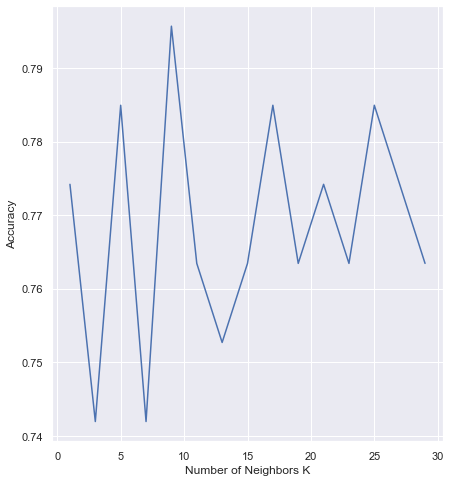

In [40]:
# visualising accuracy vs K values 

plt.plot(neighbors, kscore_list)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()

 - The maximum accuracy was found to be at K = 9, hence evaluating other metrics with k = 3.

In [50]:
# model with K=3, as it came out as the best

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, Y_train)
Y_pred3 = knn.predict(X_test)
print(classification_report(Y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.59      0.72      0.65        18
           2       0.95      0.85      0.90        47

    accuracy                           0.76        93
   macro avg       0.72      0.74      0.73        93
weighted avg       0.78      0.76      0.77        93



- Other metrics like precision, recall and f1-score agree with the accuracy (k=3)
-  precision, recall and f1-score are close to each other, hence the model is **neither overfit nor underfit** on the test data 

#### 7.1.1 Checking a different distance metric

In [53]:
knn3_p3 = KNeighborsClassifier(n_neighbors=3, p=3)
knn3.fit(X_train, Y_train)
Y_pred3_p3 = knn.predict(X_test)
print(classification_report(Y_test, Y_pred3_p3))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.59      0.72      0.65        18
           2       0.95      0.85      0.90        47

    accuracy                           0.76        93
   macro avg       0.72      0.74      0.73        93
weighted avg       0.78      0.76      0.77        93



In [54]:
knn3_p1 = KNeighborsClassifier(n_neighbors=3, p=1)
knn3.fit(X_train, Y_train)
Y_pred3_p1 = knn.predict(X_test)
print(classification_report(Y_test, Y_pred3_p1))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63        28
           1       0.59      0.72      0.65        18
           2       0.95      0.85      0.90        47

    accuracy                           0.76        93
   macro avg       0.72      0.74      0.73        93
weighted avg       0.78      0.76      0.77        93



- My model is not chnaging parameters with the distance metric (p), hence fixing with the standard distance with K = 3 as the final KNN model

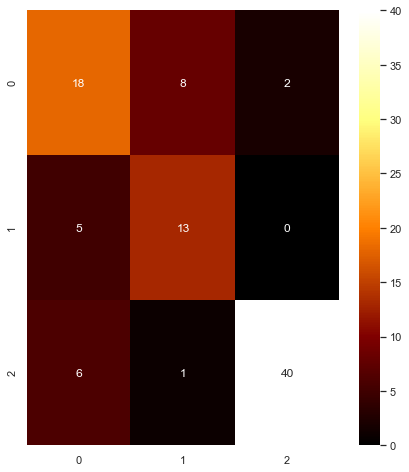

In [51]:
sns.heatmap(confusion_matrix(Y_test, Y_pred3), annot=True,cmap='afmhot', fmt='g');

- the confusion matrix depicts correct classification of 18 under normal category
- correct classification of 13 under Type_H category
- correct classification **of 40 under Type_S category**
- Number of misclassifications is 22.

## 8. Conclusions:

1. P_incidence vs L_angle have a good correlation.
2. P_incidence vs S_slope have a good correlation.
3. S_slope vs L_angle have a good correlation.
4. Most of the outliers follow the type_S as its class.
5. K Nearest Neighbour classifier worked best with K = 3.
6. At K = 3, it yielded the accuracy as ~79%, which was found to be better than all other models with K not equal to 3
7. Further tuning did not affect the accuracy much, hence the prior model one was finalized.
8. 71 out of 93 data points were correctly classified, as shown by the confusion matrix.


## 9. Suggestions

### 1. Quantity

- More data can be loaded from various sources within the company so that more information can be captured
- If necessary source of the source can be increased - Marketing, campaigns, human traffic, surveys, etc.
- Based on the output demand, if needed extra features can be adding, thus increasing the quantity of the entire dataset

### 2. Quality
- The data must come from a trustworthy source.
- Any approximation should be mentioned while handling the data to the model building team.
- The data initially can have parmeters like probability and confidence intervals.
- Lot of missing values / null values should be avoided at the collection source

### 3. Variety
- meta data from varoius sources should be consistent
- Semi-Structured and unstrcutured data must be carefully logged, as it is hard to deal with
- the column definitions must be clear with respect to the business context, so the analyst does not interpret it as something else
- Complex unstructured data can be avoided if not necessary

### 4. Velocity
- Real time trustworthy data collection.
- If need be, at the root level re-definition of few parameters must be possible.
- data quality assesment can be done to make the data better.
- Proper initial sampling can be performed every time a data entry takes place.

             ------------------------------------------- END --------------------------------------------------------